In [283]:
import os
import codecs
import sys
import numpy as np
import pandas as pd
import boto3
import json
from matplotlib import pyplot as plt
from smart_open import smart_open
import seaborn as sns

In [233]:
#Initial SetUp
ACCESS_KEY = 'XXXXXX'
SECRET_KEY = 'XXXXXX'
bucket_name = 'bucket_name'
Bucket_location = 'us-west-2'
client = boto3.client('s3') #low-level functional API
file_path = 's3://bucket_name/USvideos.csv'
file_path2 = 's3://bucket_name/US_category_id.json'

### Dataframe USVideos CSV from S3

In [234]:
bucket_name = 'bucket_name'
object_key_csv = 'USvideos.csv'
path = 's3://{}:{}@{}/{}'.format(ACCESS_KEY, SECRET_KEY, bucket_name, object_key_csv)
df_csv = pd.read_csv(smart_open(path))

C:\Users\Dj_ka\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### DataFrame US_category_id JSON file from S3

In [235]:
object_key_json = 'US_category_id.json'
path_json = 's3://{}:{}@{}/{}'.format(ACCESS_KEY, SECRET_KEY, bucket_name,object_key_json)
df_json = pd.read_json(smart_open(path_json))
df_json.info()
df_json.to_json('cat.json')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
kind     32 non-null object
etag     32 non-null object
items    32 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


### Let's do some cleaning

In [236]:
for df in df_csv:
    # video_id 
    df_csv['video_id'] = df_csv['video_id'].astype('str') 
    
    # trending date
    df_csv['trending_date'] = df_csv['trending_date'].astype('str') 
    date_pieces = (df_csv['trending_date'].str.split('.'))
    df_csv['Year'] = date_pieces.str[0].astype(int)
    df_csv['Day'] = date_pieces.str[1].astype(int)
    df_csv['Month'] = date_pieces.str[2].astype(int)
    updatedyear = []
    
    
for i in range(len(df)): 
    y = df_csv.loc[i, "Year"]
    new_year = y+2000
    updatedyear.append(new_year)

for i in range(len(df)):
        newy = updatedyear[i]
        tr = df_csv.loc[i, "Year"]
        df_csv['Year'].replace(to_replace = tr, value = newy, inplace=True)

In [237]:
df_csv.sort_values(by='dislikes',ascending=False).head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,18,9,1
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",2017,14,12
11096,QwZT7T-TXT0,18.08.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",35983135,1370845,1611043,1321281,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,18,8,1
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",2017,13,12
5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",2017,12,12


In [238]:
#title
df_csv['title'] = df_csv['title'].astype('str')    
#channel_title
df_csv['channel_title'] = df_csv['channel_title'].astype('str')
#category_id
df_csv['category_id'] = df_csv['category_id'].astype(str) 
#tags
df_csv['tags'] = df_csv['tags'].astype('str')
#thumbnail_link
df_csv['thumbnail_link'] = df_csv['thumbnail_link'].astype('str') 
#description
df_csv['description'] = df_csv['description'].astype('str')

In [239]:
# Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
df_csv['comments_disabled'] = df_csv['comments_disabled'].astype('category') 
df_csv['ratings_disabled'] = df_csv['ratings_disabled'].astype('category') 
df_csv['video_error_or_removed'] = df_csv['video_error_or_removed'].astype('category')

In [240]:
# publish_time 
df_csv['publish_time'] = pd.to_datetime(df_csv['publish_time'], errors='coerce',format='%Y-%m-%dT%H:%M:%S.%fZ')

In [241]:
df_csv.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,14,11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017,14,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,14,11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017,14,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,14,11


### Let's clean missing values
##### Here we're looking for missing values in the given dataset, Missing values plays major role in statistical examination. As we can see in heatmap, we have missing values in description column, which is not containing any numarical data.

<Figure size 432x288 with 0 Axes>

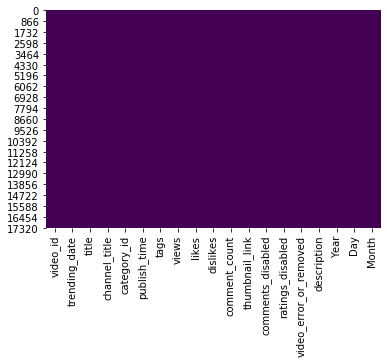

<Figure size 432x288 with 0 Axes>

In [242]:
for df in df_csv:
    sns.heatmap(df_csv.isnull(), cmap = 'viridis', cbar=False)
    sns.color_palette("bright", 10)
plt.figure()

In [243]:
# See counts of missing value
for c in df_csv.columns:
    print(c,np.sum(df_csv[c].isnull()))

video_id 0
trending_date 0
title 0
channel_title 0
category_id 0
publish_time 0
tags 0
views 0
likes 0
dislikes 0
comment_count 0
thumbnail_link 0
comments_disabled 0
ratings_disabled 0
video_error_or_removed 0
description 0
Year 0
Day 0
Month 0


## The 1,000 most viewed videos

In [303]:
most_viewed = df_csv.sort_values(by='views',ascending=False).groupby('title').views.sum().rename('Total_Views').\
reset_index().sort_values(by='Total_Views',ascending = False).nlargest(1000,['Total_Views'])
most_viewed.shape
most_viewed.to_csv('s3://bucket_name/output/1000_most_viewed_videos.csv')

(1000, 2)

## The 1,000 most disliked videos

In [304]:
new_dislike_df = df_csv.sort_values('dislikes', ascending=False).groupby(['title'], sort=False).head(1000)
most_dislikes = new_dislike_df.nlargest(1000,['dislikes'])
most_dislikes.shape
most_dislikes.to_csv('s3://bucket_name/output/1000_most_disliked_video.csv', encoding='utf-8')

(1000, 19)

## The 1,000 most popular channels
###### Here we will assume, 1000 most popular channels by views

In [305]:
most_popular = df_csv.groupby('channel_title').views.sum().rename('total_views').\
reset_index().sort_values(by='total_views',ascending=False)
most_popular_new = most_popular.nlargest(1000,['total_views'])
most_popular_new.shape
most_popular_new.to_csv('s3://bucket_name/output/1000_most_popular_channels.csv', encoding = 'utf-8')

(1000, 2)

## The 10 most viewed categories

In [306]:
most_categories = df_csv.groupby('category_id').views.sum().rename('total_views').\
reset_index().sort_values(by='total_views',ascending=False).nlargest(10,'total_views')
most_categories.shape
most_categories.to_csv('s3://bucket_name/output/10_most_viewed_categories.csv')

(10, 2)